In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


From the top FTSE 100
I selected
AstraZeneca - AZN
Shell - SHEL
HSBC - HSBA
Unilever Group - ULVR
Bristish American Tobacco - BATS

In [ ]:
# Load stock data

AstraZeneca = yf.download('AZN.L', start='2014-01-01', end='2023-01-01')
Shell = yf.download('SHEL.L', start='2014-01-01', end='2023-01-01')
HSBC = yf.download('HSBA.L', start='2014-01-01', end='2023-01-01')
Unilever = yf.download('ULVR.L', start='2014-01-01', end='2023-01-01')
BritishTobacco = yf.download('BATS.L', start='2014-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Function to format data

def format(df):
  df.reset_index(inplace=True)
  df['Date'] = pd.to_datetime(df['Date'])
  df = df.set_index('Date')
  df['Return'] = df['Adj Close'].pct_change()
  df.dropna(inplace=True)
  df = df[['Adj Close']]
  return df

In [ ]:
AstraZeneca = format(AstraZeneca)
Shell = format(Shell)
HSBC = format(HSBC)
Unilever = format(Unilever)
BritishTobacco = format(BritishTobacco)

In [ ]:
BritishTobacco.head()

,Adj Close
Date,
2014-01-03,1676.757202
2014-01-06,1679.638794
2014-01-07,1669.159424
2014-01-08,1652.915894
2014-01-09,1630.384277


In [ ]:
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(AstraZeneca, Shell, on='Date', suffixes=('_AstraZeneca', '_Shell'))
merged_df = pd.merge(merged_df, HSBC, on='Date')
merged_df = pd.merge(merged_df, Unilever, on='Date', suffixes=('_HSBC', '_Unilever'))
merged_df = pd.merge(merged_df, BritishTobacco, on='Date')
merged_df.reset_index(inplace=True)
merged_df.columns = ['Date', 'Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco']
merged_df.head()

,Date,Adj_Close_AstraZeneca,Adj_Close_Shell,Adj_Close_HSBC,Adj_Close_Unilever,Adj_Close_BritishTobacco
0,2014-01-03,2490.232178,1226.886597,365.536041,1716.981079,1676.757202
1,2014-01-06,2499.261230,1220.349854,367.540802,1714.172485,1679.638794
2,2014-01-07,2474.258301,1227.170532,376.339386,1715.577271,1669.159424
3,2014-01-08,2465.228760,1218.360474,375.615570,1691.700684,1652.915894
4,2014-01-09,2481.203125,1219.212891,372.051422,1664.312744,1630.384277


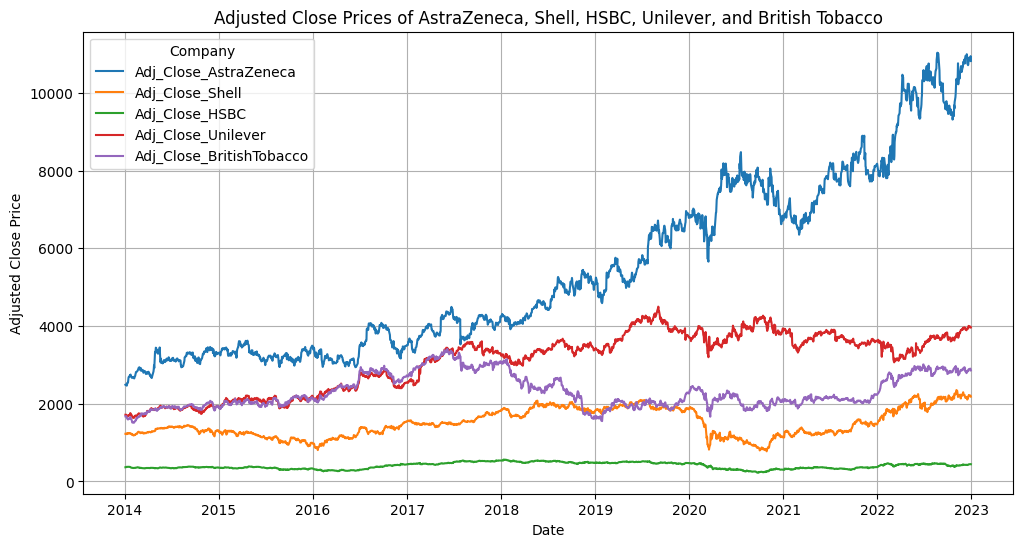

In [ ]:
# Transform data to long format
long_df = pd.melt(merged_df, id_vars=['Date'], value_vars=['Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco'],
                  var_name='Company', value_name='Adj_Close')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x='Date', y='Adj_Close', hue='Company')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices of AstraZeneca, Shell, HSBC, Unilever, and British Tobacco')
plt.legend(title='Company')
plt.grid(True)
plt.show()

In [ ]:
print(merged_df.describe())

       Adj_Close_AstraZeneca  Adj_Close_Shell  Adj_Close_HSBC  \
count            2270.000000      2270.000000     2270.000000   
mean             5424.615760      1503.873853      402.027996   
std              2263.729399       358.595670       80.027791   
min              2465.229004       775.309631      225.027634   
25%              3388.871094      1229.089203      339.755226   
50%              4617.593506      1429.761780      383.103821   
75%              7276.813477      1855.862152      473.307930   
max             11032.589844      2352.267090      562.671753   

       Adj_Close_Unilever  Adj_Close_BritishTobacco  
count         2270.000000               2270.000000  
mean          3102.574908               2315.776791  
std            753.897706                430.073581  
min           1634.818848               1509.605469  
25%           2358.833435               1989.197906  
50%           3374.385376               2151.329346  
75%           3677.381836           

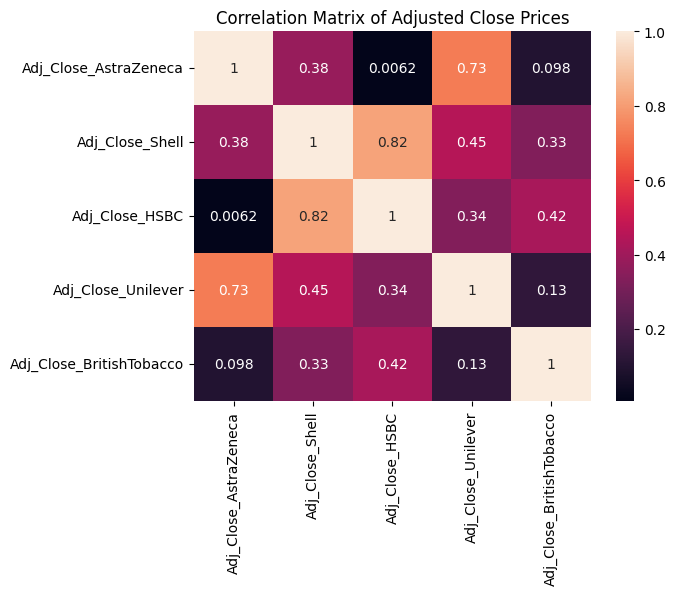

In [ ]:
# Use Heatmap to view correlation matrix

adj_close_columns = ['Adj_Close_AstraZeneca', 'Adj_Close_Shell', 'Adj_Close_HSBC', 'Adj_Close_Unilever', 'Adj_Close_BritishTobacco']
correlation_matrix = merged_df[adj_close_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Adjusted Close Prices')
plt.show()

In [ ]:
merged_df.head()

,Adj_Close_AstraZeneca,Adj_Close_Shell,Adj_Close_HSBC,Adj_Close_Unilever,Adj_Close_BritishTobacco,AstraZeneca_MA20,AstraZeneca_MA50
Date,,,,,,,
2014-03-14,2797.531494,1233.545044,339.283264,1681.060791,1740.162598,2874.367493,2749.614263
2014-03-17,2838.640625,1238.437988,338.659302,1680.351440,1727.478394,2874.858789,2756.401851
2014-03-18,2844.359863,1251.677002,339.169800,1694.531616,1755.815186,2874.958899,2763.803882
2014-03-19,2843.645264,1246.784424,335.709412,1693.823242,1745.020630,2874.619336,2771.372207
2014-03-20,2818.264648,1240.164673,337.070801,1685.314453,1735.034790,2872.689014,2778.113438


In [ ]:
# Load vix data
vix = pd.read_csv('/content/drive/MyDrive/VIX_2.csv')
vix['Date'] = pd.to_datetime(vix['Date'])
vix = vix.set_index('Date')
vix = vix[['Adj Close']]
vix = format(vix)
vix.head()

,Adj Close
Date,
2014-01-03,13.76
2014-01-06,13.55
2014-01-07,12.92
2014-01-08,12.87
2014-01-09,12.89


In [ ]:
# Extract the relevant column for Shell's adjusted close prices
shell_prices = merged_df[['Date', 'Adj_Close_Shell']]
shell_prices.set_index('Date', inplace=True)
shell_prices.head()

,Adj_Close_Shell
Date,
2014-01-03,1226.886597
2014-01-06,1220.349854
2014-01-07,1227.170532
2014-01-08,1218.360474
2014-01-09,1219.212891


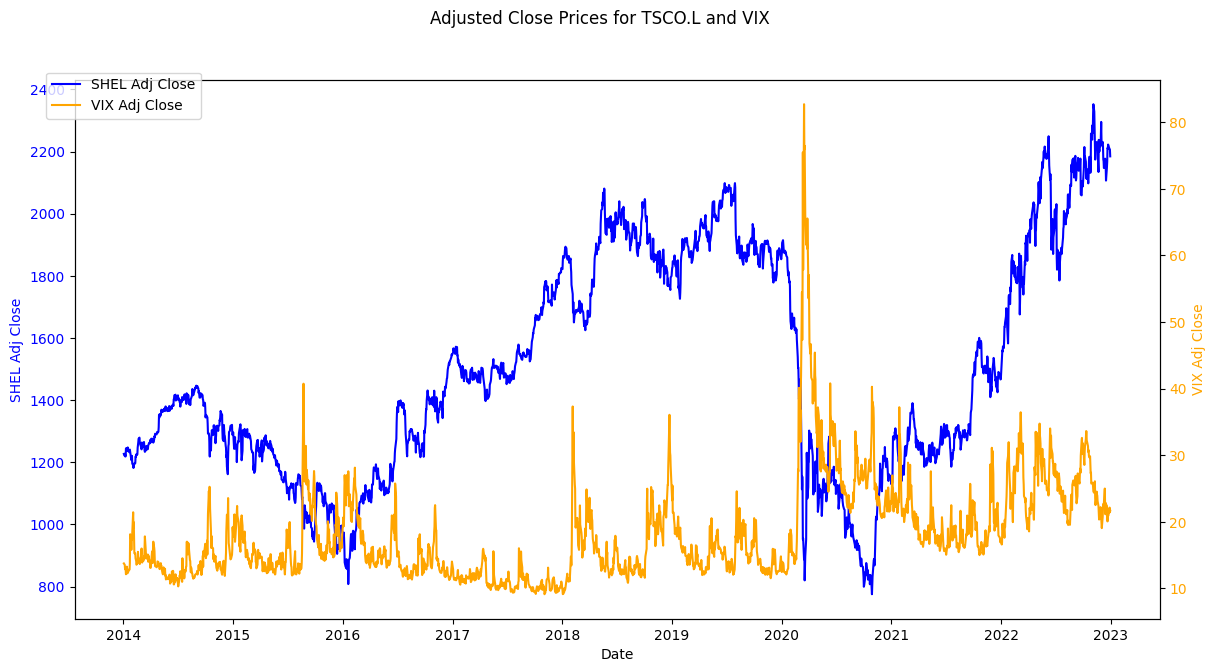

In [ ]:
# Plotting Adj Close prices for VIX and Stock Adj Close using secondary y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(shell_prices.index, shell_prices['Adj_Close_Shell'], label='SHEL Adj Close', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('SHEL Adj Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(vix.index, vix['Adj Close'], label='VIX Adj Close', color='orange')
ax2.set_ylabel('VIX Adj Close', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.suptitle('Adjusted Close Prices for TSCO.L and VIX')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

In [ ]:
shell_vix = pd.merge(shell_prices, vix, how='inner', on='Date')

shell_vix.head()

,Adj_Close_Shell,Adj Close
Date,,
2014-01-03,1226.886597,13.76
2014-01-06,1220.349854,13.55
2014-01-07,1227.170532,12.92
2014-01-08,1218.360474,12.87
2014-01-09,1219.212891,12.89


In [ ]:
# renaming shell_vix columns
shell_vix.rename(columns={
    'Adj Close': 'VIX_Adj_Close',
}, inplace=True)

shell_vix.head()

,Adj_Close_Shell,VIX_Adj_Close
Date,,
2014-01-03,1226.886597,13.76
2014-01-06,1220.349854,13.55
2014-01-07,1227.170532,12.92
2014-01-08,1218.360474,12.87
2014-01-09,1219.212891,12.89


**Training model with Feed-forward neural network**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError

Training data shape: (1777, 0), (1777, 2)
Testing data shape: (445, 0), (445, 2)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                64        
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4354 (17.01 KB)
Trainable params: 4354 (17.01 KB)
Non-trainable params: 0 (0.00 Byte)
_____

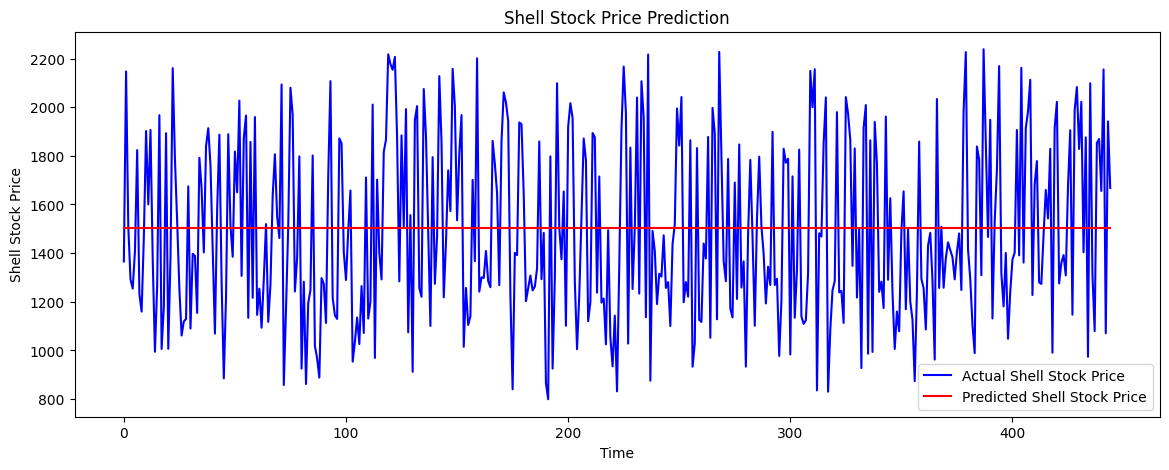

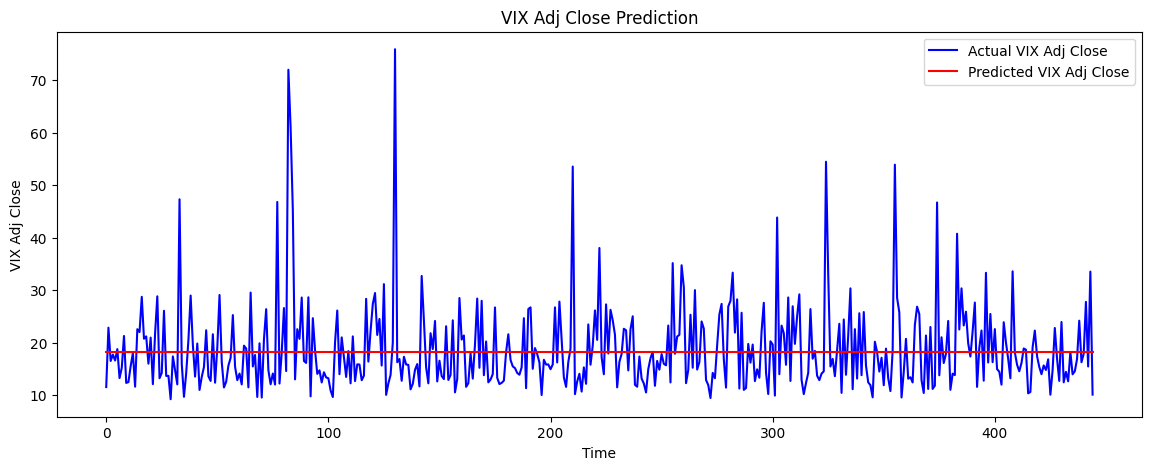

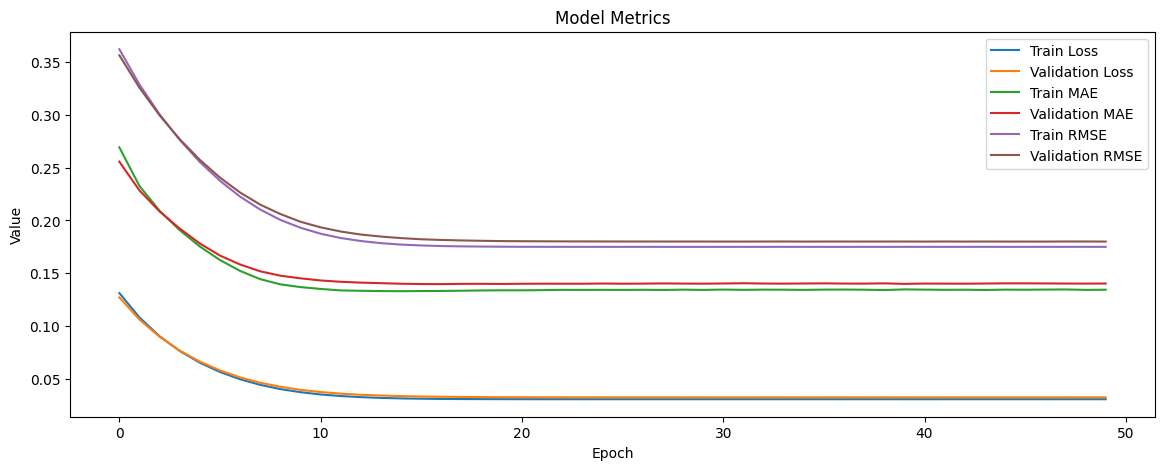

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(shell_vix)

# Split data into train and test sets
train_data, test_data = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Separate features and target variables
X_train = train_data[:, :-2]
y_train = train_data[:, -2:]
X_test = test_data[:, :-2]
y_test = test_data[:, -2:]

# Check the shapes of the data
print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')

# Build the feed-forward neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), RootMeanSquaredError()])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, mae, rmse = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

# Make predictions
predictions = model.predict(X_test)

# Prepare the data for inverse transformation
predictions_extended = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_extended[:, -2:] = predictions

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions_extended)[:, -2:]

# Inverse transform the test data for plotting
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))
y_test_extended[:, -2:] = y_test
y_test_scaled = scaler.inverse_transform(y_test_extended)[:, -2:]

# Calculate R² score for each feature
r2_adj_close_shell = r2_score(y_test_scaled[:, 0], predictions[:, 0])
r2_vix_adj_close = r2_score(y_test_scaled[:, 1], predictions[:, 1])
print(f'R² score for Adj_Close_Shell: {r2_adj_close_shell}')
print(f'R² score for VIX_Adj_Close: {r2_vix_adj_close}')

# Plot the results for Adj_Close_Shell
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled[:, 0], color='blue', label='Actual Shell Stock Price')
plt.plot(predictions[:, 0], color='red', label='Predicted Shell Stock Price')
plt.title('Shell Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Shell Stock Price')
plt.legend()
plt.show()

# Plot the results for VIX_Adj_Close
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled[:, 1], color='blue', label='Actual VIX Adj Close')
plt.plot(predictions[:, 1], color='red', label='Predicted VIX Adj Close')
plt.title('VIX Adj Close Prediction')
plt.xlabel('Time')
plt.ylabel('VIX Adj Close')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

**Training with RNN model**

Created sequences X shape: (2162, 60, 2), y shape: (2162, 2)
Reshaped X_train shape: (1729, 60, 2)
Reshaped X_test shape: (433, 60, 2)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 50)            10600     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 3

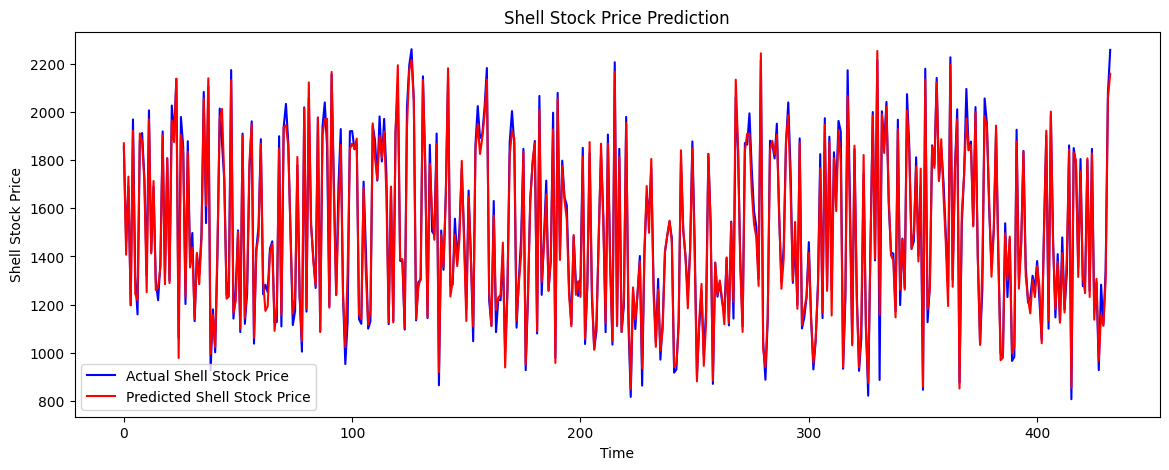

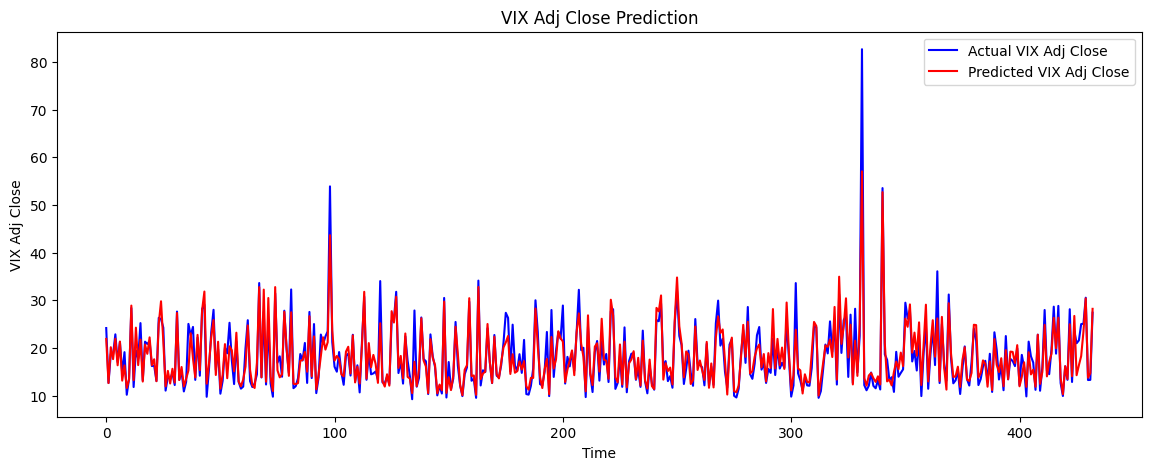

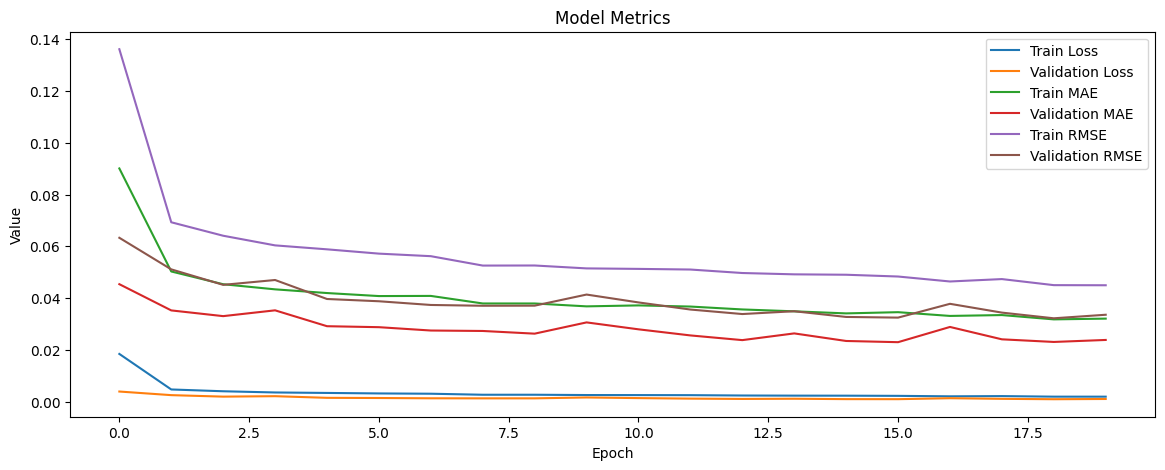

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(shell_vix)

# Function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]  # Predicting both 'Adj_Close_Shell' and 'VIX_Adj_Close'
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Check shapes of the created sequences
print(f'Created sequences X shape: {X.shape}, y shape: {y.shape}')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Check the shapes after reshaping
print(f'Reshaped X_train shape: {X_train.shape}')
print(f'Reshaped X_test shape: {X_test.shape}')

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=2))  # Output layer with 2 units

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), RootMeanSquaredError()])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, mae, rmse = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

# Make predictions
predictions = model.predict(X_test)

# Prepare the data for inverse transformation
predictions_extended = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions_extended[:, :2] = predictions

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions_extended)[:, :2]

# Inverse transform the test data for plotting
y_test_extended = np.zeros((y_test.shape[0], scaled_data.shape[1]))
y_test_extended[:, :2] = y_test
y_test_scaled = scaler.inverse_transform(y_test_extended)[:, :2]

# Calculate R² score for each feature
r2_adj_close_shell = r2_score(y_test_scaled[:, 0], predictions[:, 0])
r2_vix_adj_close = r2_score(y_test_scaled[:, 1], predictions[:, 1])
print(f'R² score for Adj_Close_Shell: {r2_adj_close_shell}')
print(f'R² score for VIX_Adj_Close: {r2_vix_adj_close}')

# Plot the results for Adj_Close_Shell
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled[:, 0], color='blue', label='Actual Shell Stock Price')
plt.plot(predictions[:, 0], color='red', label='Predicted Shell Stock Price')
plt.title('Shell Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Shell Stock Price')
plt.legend()
plt.show()

# Plot the results for VIX_Adj_Close
plt.figure(figsize=(14, 5))
plt.plot(y_test_scaled[:, 1], color='blue', label='Actual VIX Adj Close')
plt.plot(predictions[:, 1], color='red', label='Predicted VIX Adj Close')
plt.title('VIX Adj Close Prediction')
plt.xlabel('Time')
plt.ylabel('VIX Adj Close')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

**Training with Decision Tree model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data
features = shell_vix[['Adj_Close_Shell', 'VIX_Adj_Close']].values
target = shell_vix['Adj_Close_Shell'].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')
print(f'R² score: {r2}')

Test MSE: 2.058262202319469
Test MAE: 0.6994613818908005
R² score: 0.999984438605065
